MECANISMO CUATRO BARRAS 

PROBLEMA POSICIÓN

PASO 1: DEFINICIÓN DEL VECTOR q

El vector q de dimensión nx1 contiene las coordenadas dependientes del mecanismo. Es decir, contiene las coordenadas que no se mantienen fijas ya que varían con el tiempo. El mecanismo propuesto lo hemos modelizado enpleando las 5 coordenadas:

qT = (X1, Y1, X2, Y2, theta)

El vector de coordenadas dependientes sería la traspuesta de qT. Es decir:

q = ([X1], [Y1], [X2], [Y2], [theta])

PASO 2: DETERMINACIÓN DEL NÚMERO DE ECUACIONES DE RESTRICCIÓN

Necesitamos calcular el número de ecuaciones de restricción que vamos a aplicar. La ecuación con la que lo vamos a calcular:

m = n - G

Siendo:

n -> Número de barras
G -> Número de grados de libertad

Los grados de libertad se calculan:

G = 3(n-1) - 2PI - PII

Siendo:

PI -> Numero de pares binarios de un grado de libertad
PII -> Número de pares binarios de dos grados de libertad.

En este caso tendríamos:

n = 4
PI = 4

Por lo tanto:

G = 3·(4-1) - 2·4 - 0 = 1 

m = 4 - 1 = 3 

Necesitamos 3 ecuaciones de restricción.



PASO 3: AÑADIR LAS LIBRERÍAS

Al igual que en otros entornos de programación, necesitamos añadir librerías que contengan las funciones que vamos a utilizar. Esto es necesario hacerlo al principio del código. Las que vamos a usar son las siguientes: 

1. numpy -> Sirve para trabajar con arrays y matrices.
2. math -> La utilizaremos para usar funciones matemáticas.
3. pprint -> Su función es depurar.
4. matplotlib.animation -> Esta librería la utilizaremos para        realizar la animación del mecanismo.
5. matplotlib.pyplot -> Es necesaria para dibujar gráficas.
6. os -> Incluye funciones como borrar la pantalla o esperar a que    el usuario pulse una tecla para continuar ejecutando código.
7. time.sleep ->
8. matplotlib inline -> Es una función necesaria en jupyter          notebook para que la animación se ejecute correctamente.


In [1]:
#PASO 3

import numpy as np
import math as math
#import array as arr
import pprint  
import matplotlib.pyplot as plt  
import matplotlib.animation as animation
import scipy.integrate as integrate 
import os
from time import sleep
%matplotlib inline 


PASO 4: LECTURA DE LOS DATOS INICIALES

Los datos iniciales de los que partiremos para resolver este mecanismo mediante análisis cinemático por métodos numéricos son las variables independientes, es decir, las que no cambian como el tiempo. En este caso serían las longitudes de las barras y las posiciones de los apoyos.

Además, como el mecanismo tiene un único grado de libertad, tenemos que escoger su variable entre las componentes del vector q. En este caso hemos escogido el ángulo, por lo que también será un dato de partida. 

1. Longitudes de las barras: L1, L2 y L3.
2. Posición de los dos apoyos: XA, YA, XB e YB.
3. Ángulo que forma la primera barra respecto a la horizontal en radianes: theta.

Una vez tengamos esos datos, definiremos una posición inicial.

In [2]:
#PASO 4

print ('MECANISMO DE CUATRO BARRAS')
print ('=============================')
# Lectura de datos por teclado

meca = {} # dictionary vacio, con propiedades de mecanismo

meca["L1"] = float (input ('Introduce longitud L1:'))
meca["L2"] = float (input ('Introduce longitud L2:'))
meca["L3"] = float (input ('Introduce longitud L3:'))
meca["theta"] = float (input ('Introduce angulo inicial theta:')) #En rad
meca["XB"] = float (input ('Introduce coordenada en x del punto B:'))
meca["XA"] = 0
meca["YA"] = 0
meca["YB"] = 0

# Defino posicion inicial:
q = np.array ([[0.1], [meca["L1"]], [1], [0.2], [meca["theta"]]])
print('q: ' + str(q))

MECANISMO DE CUATRO BARRAS
Introduce longitud L1:1
Introduce longitud L2:1
Introduce longitud L3:1
Introduce angulo inicial theta:0.5
Introduce coordenada en x del punto B:2
q: [[0.1]
 [1. ]
 [1. ]
 [0.2]
 [0.5]]


PASO 5: VECTOR DE RESTRICCIONES (PHI)

Este vector agrupa las ecuaciones de restricción y será de dimensión mx1.

Estas ecuaciones podrían definirse empleando diferentes tipos de coordenadas: independientes, dependientes, relativas dependientes, de punto de referencia y naturales. Estas últimas son las que vamos a usar nosotros. 

Necesitamos 3 ecuaciones de sólido rígido para las barras 1, 2 y 3. Su función es imponer los puntos de los extremos de cada barra permanezcan a una distancia constante. 

Barra 1 -> (X1 - XA)^2 + (Y1 - YA)^2 - L1^2 = 0
Barra 2 -> (X1 - X1) ^2 + (Y2 - Y1)^2 - L2^2 = 0
Barra 3 -> (XB - X2) ^2 + (YB - Y2) ^2 - L3^2 = 0 

Además, como el vector de coordenadas dependientes tiene 5 componentes tenemos que añadir una ecuación de restricción para el ángulo.

Esta última ecuación depende de si el ángulo en cuestión es demasiado pequeño. Esto se debe a que cuando un ángulo tiende a 0, su seno también lo hace, por lo que para esos casos utilizaríamos la restricción del coseno. En cambio, cuando el ángulo tiende más a 90º, es el coseno el que se aproxima a 0, por lo que en esos casos la restricción a utilizar sería la del seno. 

Estas restricciones serían las siguientes:

1. Si el coseno del ángulo es menor que la raíz cuadrada de dos partido 2: (X1 - XA) - L1·cos(theta)

2. Si el coseno del ángulo es mayor que la raíz cuadrada de dos partido 2: (Y1 - YA) - L1·sen(theta)

Por último, nos encontramos con que el vector q sigue teniendo un índice mayor que el vector de restricciones. Esto significa que aún nos falta añadir una ecuación más, ya que si no estaríamos realizando operaciones con matrices de diferentes dimensiones, lo cual es un error matemático. 

Para solucionar este problema, tenemos que considerar que el ángulo theta es un dato de partida, por lo que su valor debe permanecer fijo, por lo que Phi(4)=0.

In [3]:
#PASO 5

def Phi (q,meca):
    #Inicializa a cero Phi
    Phi = np.zeros((5,1))

    #Extraer coordenadas
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]

    Phi[0] = X1**2 + Y1**2 - meca["L1"]**2
    Phi[1] = (X2-X1)**2 + (Y2-Y1)**2 -meca["L2"]**2
    Phi[2] = (meca["XB"]-X2)**2 + Y2**2 - meca["L3"]**2

    if (math.cos(theta) < (math.sqrt(2)/2) ):
        Phi[3] = X1-meca["L1"]*math.cos(theta)
    else: 
        Phi[3] = Y1-meca["L1"]*math.sin(theta)

    return Phi


PASO 6: Matriz jacobiana 

Esta matriz de dimensiones mxn está compuesta por las derivadas parciales de las ecuaciones de restricción con respecto al vector de cooordeandas dependientes.

Por ejemplo tendríamos:

J(0,0) = Derivada de Phi(0) respecto a X1.
J(0,1) = Derivada de Phi (0) respecto a Y1.
J(1,0) = Derivada de Phi(1) respecto a X1.

Tendríamos que construir la matriz elemento a elemento de esta manera. 

Para la ecuación del ángulo hay que tener en cuenta que el jacobiano también tomará dos valores. Los posibles son: 

1. Si el coseno del ángulo es menor de raíz cuadrada de dos partido dos:  
    - J(3,0) = 1
    - J(3,4) = L1 · sin(theta)
    
2. Si el coseno del ángulo es mayor de raíz cuadrada de dos partido dos:
    - J(3,1) = 1
    - J(3,4) = -L1 · cos(theta)
    
Además, para la última ecuación añadida del vector Phi también habrá que añadir una fila en la matriz jacobiana. Al haber impuesto la condición de que el ángulo permanezca constante, tendremos una fila con todos los términos de valor 0 a excepción de el último término, que sería 1. 

In [4]:
#PASO 6

def jacob_Phiq(q,meca):
    #Inicializa a cero la matriz jacobiana
    Jacob = np.zeros((5,5))

    #Extraer coordenadas

    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    theta = q[4]

    #Montar matriz

    Jacob[0,0] = 2*X1
    Jacob[0,1] = 2*Y1
    Jacob[1,0] = -2*(X2-X1)
    Jacob[1,1] = -2*(Y2-Y1)
    Jacob[1,2] = 2*(X2-X1)
    Jacob[1,3] = 2*(Y2-Y1)
    Jacob[2,2] = -2*(meca["XB"]-X2)
    Jacob[2,3] = -2*(0-Y2)

    if (math.cos(theta) < (math.sqrt(2)/2) ):
        Jacob[3,4] = meca["L1"]*math.sin(theta)
        Jacob[3,0] = 1
    else:
        Jacob[3,4] = -meca["L1"]*math.cos(theta)
        Jacob[3,1] = 1


    Jacob[4,4] = 1

    return Jacob


PASO 7: RESOLUCIÓN DEL PROBLEMA POSICIÓN

El objetivo es obtener los valores de las coordenadas dependientes del vector q. 

Para resolverlo partimos de la ecuación:

Phi(q+deltaQ) = Phi + Jacob · deltaQ = 0

De donde despejamos:

deltaQ = -Phi/Jacob

Y tendríamos que:

q = q + deltaQ

Hay que repetir este proceso hasta que el vector Phi se aproxime a 0, lo que indicaría la validez del vector q calculado. Sin embargo, hay datos iniciales para los que el mecanismo non converge. Por ejemplo, si decimos que XA=0, XB=2 y L2=32, no existe tal posición. Por ello, tenemos que poner un límite de iteraciones, como por ejemplo 100, y si llega a dicho límite tendremos que el mecanismo no converge.

Otra forma de meidir el error en el cálculo de q es calculando el módulo del vector deltaQ. Tiene que ser lo más próximo a 0. 

Por último, podemos saber si el mecanismo convergerá calculando el rango de la matriz jacobiana. Si su rango es igual al número de coordenadas dependientes, convergerá.

In [5]:
#PASO 7

def resuelve_prob_posicion(q_init, meca):
    #Inicializacion de variables
    error = 1e10
    tolerancia = 1e-10

    #Inicializacion en cero de deltaQ, fi y q
    deltaQ = np.zeros ((5,1))
    q = q_init
    i=0

    # Iteraciones hasta conseguir que el error sea menor que la tolerancia

    while (error > tolerancia and i<=100):
        print("q=")
        pprint.pprint(q)


        #Extraer las coordenadas
        X1 = q[0]
        Y1 = q[1]
        X2 = q[2]
        Y2 = q[3]
        theta = q[4]
       
        fi=Phi(q,meca)
        print ("Phi" + "=")
        pprint.pprint(fi)
        J = jacob_Phiq(q,meca)
        print ("jacob" + "=")
        pprint.pprint(J)
        rango = np.linalg.matrix_rank(J, 1e-5)
        print("rango=" + str(rango) + "\n") #Si el rango es menor que el numero de filas no tiene solucion
        
        deltaQ = np.linalg.solve(J,-fi)
        q = q + deltaQ
        error = np.linalg.norm(deltaQ)  # El error es el modulo del vector
        i=i+1

        
        print("error iter" + str(i) + "=")
        pprint.pprint(error)
    print("num iters:" + str(i))
    return q

resuelve_prob_posicion(q,meca)

q=
array([[0.1],
       [1. ],
       [1. ],
       [0.2],
       [0.5]])
Phi=
array([[0.01      ],
       [0.45      ],
       [0.04      ],
       [0.52057446],
       [0.        ]])
jacob=
array([[ 0.2       ,  2.        ,  0.        ,  0.        ,  0.        ],
       [-1.8       ,  1.6       ,  1.8       , -1.6       ,  0.        ],
       [ 0.        ,  0.        , -2.        ,  0.4       ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        , -0.87758256],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ]])
rango=5

error iter1=
9.459416641209742
q=
array([[ 5.25574461],
       [ 0.47942554],
       [-0.53278378],
       [-7.56391891],
       [ 0.5       ]])
Phi=
array([[26.85270029],
       [97.20245083],
       [62.6278629 ],
       [ 0.        ],
       [ 0.        ]])
jacob=
array([[ 10.51148923,   0.95885108,   0.        ,   0.        ,
          0.        ],
       [ 11.57705679,  16.08668889, -11.57705679, -16.08668889,
         

array([[ 0.87758256],
       [ 0.47942554],
       [ 1.12761134],
       [-0.48881287],
       [ 0.5       ]])

PASO 8: Dibujar el mecanismo

Para dibujar el mecanismo, definimos un cuadro de dibujo con los ejes de la misma dimensión. Seguidamente, dibujamos cada barra por separado. 
Para dibujar cada barra tendríamos que indicar las posiciones inicial y final, yendo por un lado las coordenadas en el eje X y por otro las coordenadas en el eje Y. Es decir, sería por ejemplo:

Barra 1 ->  ([XA, X1], [YA, Y1])


q=
array([[0.1],
       [1. ],
       [1. ],
       [0.2],
       [0.5]])
Phi=
array([[0.01      ],
       [0.45      ],
       [0.04      ],
       [0.52057446],
       [0.        ]])
jacob=
array([[ 0.2       ,  2.        ,  0.        ,  0.        ,  0.        ],
       [-1.8       ,  1.6       ,  1.8       , -1.6       ,  0.        ],
       [ 0.        ,  0.        , -2.        ,  0.4       ,  0.        ],
       [ 0.        ,  1.        ,  0.        ,  0.        , -0.87758256],
       [ 0.        ,  0.        ,  0.        ,  0.        ,  1.        ]])
rango=5

error iter1=
9.459416641209742
q=
array([[ 5.25574461],
       [ 0.47942554],
       [-0.53278378],
       [-7.56391891],
       [ 0.5       ]])
Phi=
array([[26.85270029],
       [97.20245083],
       [62.6278629 ],
       [ 0.        ],
       [ 0.        ]])
jacob=
array([[ 10.51148923,   0.95885108,   0.        ,   0.        ,
          0.        ],
       [ 11.57705679,  16.08668889, -11.57705679, -16.08668889,
         

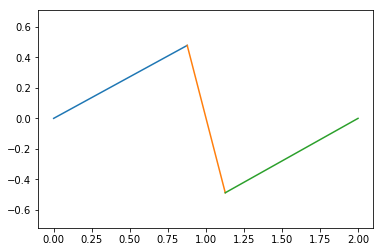

In [6]:
#PASO 8 


def dibuja_mecanismo(q, meca):
    
    q = resuelve_prob_posicion(q,meca)
    
    # Extraer los puntos moviles del mecanismo
    X1 = q[0]
    Y1 = q[1]
    X2 = q[2]
    Y2 = q[3]
    
    
    plt.axis('equal')
    
    
    plt.plot ([meca["XA"], X1], [meca["YA"], Y1])    #[pos inicial (x1,x2), pos final (y1,y2)]
    plt.plot ([X1, X2], [Y1, Y2])  
    plt.plot ([X2, meca["XB"]], [Y2, meca ["YB"]])  



    plt.show()#block=False) 
    return

dibuja_mecanismo(q,meca)
